# Phase 3 Data Science Training Notebook

### Downloading and extracting the CIFAR-10 dataset (may take some time)

In [67]:
from os import path
if not path.exists("cifar-10-batches-py"):
    import urllib.request
    import tarfile
    print("Downloading and extracting CIFAR-10 dataset (may take a couple minutes)")
    filestream = urllib.request.urlopen(r"https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz")
    cifar_tarfile = tarfile.open(fileobj=filestream, mode="r|gz")
    cifar_tarfile.extractall()
    print("Done")
else:
    print("Found previously downloaded cifar-10-batches-py. Delete the folder if you want to download it again.")

Found previously downloaded cifar-10-batches-py. Delete the folder if you want to download it again.


In [68]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis

In [69]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

### Loading and exploring train dataset (batch 1)

In [70]:
data_batch_1 = unpickle("cifar-10-batches-py/data_batch_1")
data_batch_1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [71]:
type(data_batch_1)

dict

In [72]:
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

#### labels: a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [73]:
data_batch_1[b"labels"]

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


#### data: a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [74]:
data_batch_1[b"data"]

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [75]:
data_batch_1[b"data"].shape

(10000, 3072)

In [76]:
data_batch_1[b"data"][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

### Converting 1d arrays of image pixels to RGB images

(10000, 3, 32, 32)
(10000, 32, 32, 3)


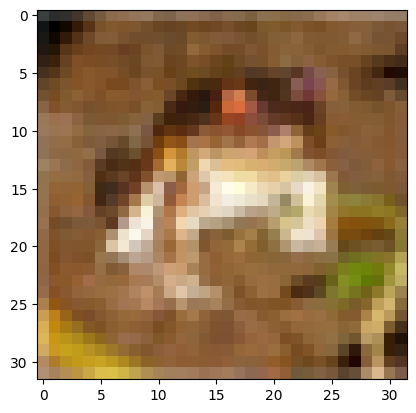

In [77]:
image_data = data_batch_1[b"data"]
# Reshaping 1d image pixels to [image,RGB,height,width]
image_data = image_data.reshape(len(image_data), 3, 32, 32)
print(image_data.shape)

# Convert [image,RGB,height,width] to [image,height,width,RGB]
image_data = image_data.transpose(0,2,3,1)
print(image_data.shape)

# Displaying image
import matplotlib.pyplot as plt
plt.imshow(image_data[0])

### Loading metadata

In [78]:
batches_meta = unpickle("cifar-10-batches-py/batches.meta")
batches_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [79]:
batches_meta.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [80]:
batches_meta[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [81]:
cifar_10_label_names = np.array(batches_meta[b"label_names"])
cifar_10_label_names.shape

(10,)

### Displaying 5 images for each label

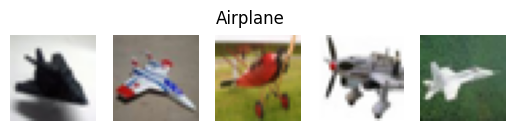

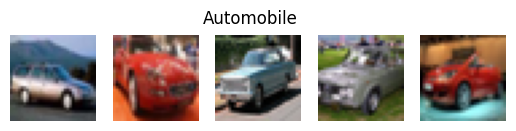

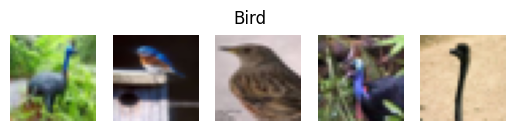

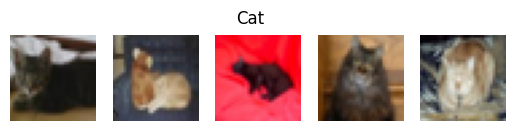

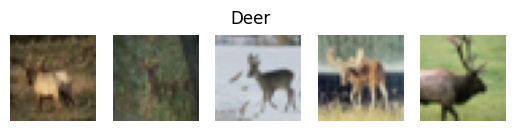

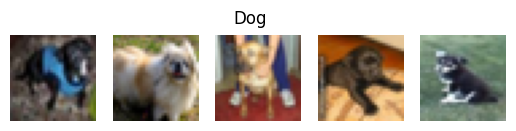

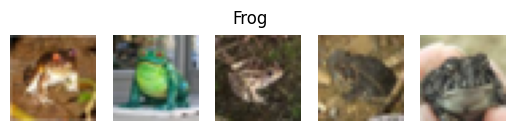

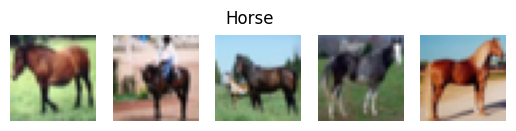

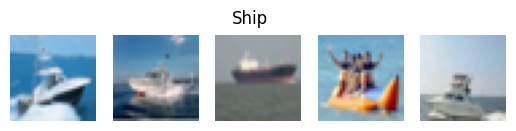

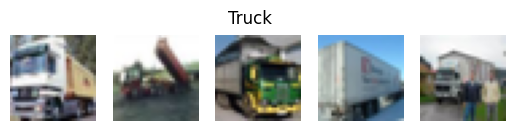

In [82]:
data_batch_1_labels = np.array(data_batch_1[b"labels"])
for label_int, label_name in enumerate(cifar_10_label_names):
    label_indices = np.where(data_batch_1_labels == label_int)[0][:5]
    
    for i in range(len(label_indices)):
        plt.subplot(1, len(label_indices), i+1)
        plt.imshow(image_data[label_indices[i]])
        plt.axis("off")
    plt.figtext(0.5, 0.61, label_name.decode().capitalize(), horizontalalignment='center', fontsize=12)
    plt.show()

### Loading test dataset

In [83]:
test_batch = unpickle("cifar-10-batches-py/test_batch")
test_batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [84]:
cifar_10_test_labels = np.array(test_batch[b"labels"])
print(f"Test labels shape: {cifar_10_test_labels.shape}")
print(f"Unique test labels: {np.unique(cifar_10_test_labels, return_counts=True)}")

Test labels shape: (10000,)
Unique test labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [85]:
cifar_10_test_data = test_batch[b"data"]
print(f"Test data shape: {cifar_10_test_data.shape}")

Test data shape: (10000, 3072)


### Picking a label

In [86]:
selected_label = 3
print(f"Selected label: {cifar_10_label_names[selected_label].decode()}")

Selected label: cat


# Data Processing

### Creating train data from images with selected label and the same number of the other images

In [87]:
train_images_filtered = []
train_labels_filtered = []

selected_label_count = 0
other_labels_count = 0
for n in range(1, 6):
    batch = unpickle(f"cifar-10-batches-py/data_batch_{n}")
    batch_labels = batch[b"labels"]
    batch_images = batch[b"data"]
    for i in range(len(batch_labels)):
        if batch_labels[i] == selected_label:
            train_images_filtered.append(batch_images[i])
            train_labels_filtered.append(batch_labels[i])
            selected_label_count += 1
        elif other_labels_count < selected_label_count:
            train_images_filtered.append(batch_images[i])
            train_labels_filtered.append(batch_labels[i])
            other_labels_count += 1
        elif len(train_images_filtered) == 10000:
            break

# Converting images
train_x = np.array(train_images_filtered).reshape(len(train_images_filtered), 3, 32, 32)

# Normalizing data from 0-255 to 0.0-1.0
#train_x = train_x.astype('float32') 
#train_x = train_x / 255.0

train_y = np.array(train_labels_filtered)

print(f"Train data: {train_x.shape}")
print(f"Train labels {train_y.shape}")
print(f"Unique train labels: {np.unique(train_y, return_counts=True)}")

Train data: (10000, 3, 32, 32)
Train labels (10000,)
Unique train labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 506,  550,  582, 5000,  549,  578,  538,  576,  566,  555],
      dtype=int64))


Most of the images must be a cat


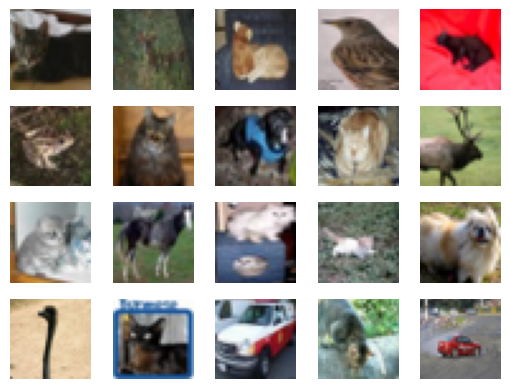

In [88]:
print(f"Most of the images must be a {cifar_10_label_names[selected_label].decode()}")
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_x[i].transpose(1,2,0))
    plt.axis("off")
plt.show()

### Creating test data

In [89]:
test_batch = unpickle("cifar-10-batches-py/test_batch")
test_labels = test_batch[b"labels"]
test_images = test_batch[b"data"]

test_images_filtered = []
test_labels_filtered = []
selected_label_count = 0
other_labels_count = 0
for i in range(len(test_labels)):
    if test_labels[i] == selected_label:
        test_images_filtered.append(test_images[i])
        test_labels_filtered.append(test_labels[i])
        selected_label_count += 1
    elif other_labels_count < selected_label_count:
        test_images_filtered.append(test_images[i])
        test_labels_filtered.append(test_labels[i])
        other_labels_count += 1
    elif len(test_images_filtered) == 20000:
        break

# Converting and normalizing test images
test_x = np.array(test_images_filtered).reshape(len(test_images_filtered), 3, 32, 32)
#test_x = test_x.astype('float32') 
#test_x = test_x / 255.0

test_y = np.array(test_labels_filtered)

print(f"Test data: {test_x.shape}")
print(f"Test labels {test_y.shape}")
print(f"Unique test labels: {np.unique(test_y, return_counts=True)}")

Test data: (2000, 3, 32, 32)
Test labels (2000,)
Unique test labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 104,  122,  110, 1000,   95,  116,  112,  112,  122,  107],
      dtype=int64))


Most of the images must be a cat


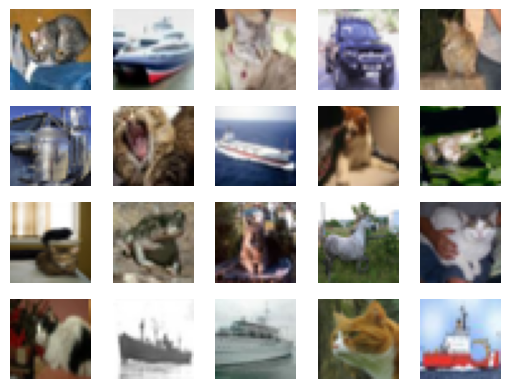

In [90]:
print(f"Most of the images must be a {cifar_10_label_names[selected_label].decode()}")
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(test_x[i].transpose(1,2,0))
    plt.axis("off")
plt.show()

### Changing values for selected label to 1, other values to 0

In [91]:
train_y = np.array([1 if x == selected_label else 0 for x in train_y])
print(f"Unique train labels: {np.unique(train_y, return_counts=True)}")

test_y = np.array([1 if x == selected_label else 0 for x in test_y])
print(f"Unique train labels: {np.unique(test_y, return_counts=True)}")

Unique train labels: (array([0, 1]), array([5000, 5000], dtype=int64))
Unique train labels: (array([0, 1]), array([1000, 1000], dtype=int64))


In [92]:
train_x = train_x.transpose(0,2,3,1)
test_x = test_x.transpose(0,2,3,1)

print(train_x.shape) # should be a list of 10000 32 x 32 uint8 images
print(train_y.shape)
print(test_x.shape) # should be a list of 2000 32 x 32 uint8 images
print(test_y.shape)

(10000, 32, 32, 3)
(10000,)
(2000, 32, 32, 3)
(2000,)


# Data Modelling

In [93]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [28]:

#def generateModel():
#    """
#    Make a Keras Sequential Model.
#    Feel free to change the layout of the layers.
#
#    Read more about keras here: https://keras.io/api/
#   Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
#    """
#    model = Sequential(name="Image_Recognition_Model")
#    model.add(Input(shape=(32,32,3))) # Input layer.
#
#    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.
#
#    model.add(layers.Dense(40, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
#    model.add(layers.Dense(25, activation="sigmoid")) # Example Hidden Layer 2. Has 25 Nodes.
#    model.add(layers.Dense(15, activation="tanh")) # Example Hidden Layer 3. Has 15 Nodes.
#    
#    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.
#
#    model.compile(
#        optimizer=optimizers.SGD(learning_rate=0.01),
#        loss=losses.MeanAbsoluteError(),
#        metrics=['accuracy']
#    )
#    
#
#    return model

In [94]:
def generateModel(hp=None):
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    # Adding convolutional layers
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss=losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [95]:
generateModel().summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 32)                921632    
                                                                 
 Output_Probability (Dense)  (None, 1)                 33        
                                           

In [96]:
model = generateModel()

log_dir = "output/logs/" #+ datetime.now().strftime("%Y-%m-%d-%H:%M:%S")

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=200, #50000,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    #verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/200
10/10 [==============================] - 19s 2s/step - loss: 0.7681 - accuracy: 0.5243 - val_loss: 0.6892 - val_accuracy: 0.5110
Epoch 2/200
10/10 [==============================] - 17s 2s/step - loss: 0.6655 - accuracy: 0.5759 - val_loss: 0.6312 - val_accuracy: 0.6715
Epoch 3/200
10/10 [==============================] - 16s 2s/step - loss: 0.6092 - accuracy: 0.6772 - val_loss: 0.5938 - val_accuracy: 0.6750
Epoch 4/200
10/10 [==============================] - 18s 2s/step - loss: 0.5667 - accuracy: 0.7122 - val_loss: 0.5605 - val_accuracy: 0.7170
Epoch 5/200
10/10 [==============================] - 15s 1s/step - loss: 0.5402 - accuracy: 0.7359 - val_loss: 0.5454 - val_accuracy: 0.7300
Epoch 6/200
10/10 [==============================] - 14s 1s/step - loss: 0.5212 - accuracy: 0.7462 - val_loss: 0.5273 - val_accuracy: 0.7415
Epoch 7/200
10/10 [==============================] - 15s 2s/step - loss: 0.5126 - accuracy: 0.7491 - val_loss: 0.5375 - val_accuracy: 0.7380
Epoch 8/200
1

In [97]:
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


INFO:tensorflow:Assets written to: output/my_model\assets


In [98]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 17ms/step - loss: 0.4757 - accuracy: 0.7790


[0.47571736574172974, 0.7789999842643738]

## python function to resize a image to 32x32 so the model can predict if it is a cat

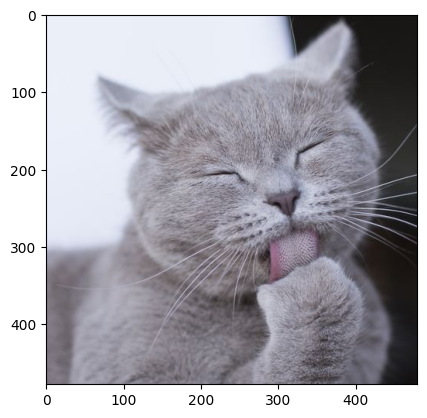

In [102]:
from PIL import Image
test_img = Image.open('cat1.png')
plt.imshow(test_img)

In [103]:

test_img = test_img.resize((32,32), Image.ANTIALIAS)
test_img = np.array(test_img)
test_img = test_img[:,:,:3]
test_img = test_img.reshape(32, 32, 3)
model.predict(np.array([test_img]))

1/1 [==============================] - 0s 24ms/step


C:\Users\viken\AppData\Local\Temp\ipykernel_56048\632017096.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  test_img = test_img.resize((32,32), Image.ANTIALIAS)


array([[0.67159265]], dtype=float32)

## Tune the model

In [104]:
from tensorflow import keras

In [105]:
import keras_tuner as kt

random_search = kt.RandomSearch(
    generateModel,
    objective='accuracy',
    max_trials=30,
    directory='tune',
    project_name='hyperparameter'
)

random_search.search(train_x, train_y, epochs=50, validation_data=(test_x, test_y))

Trial 1 Complete [00h 16m 25s]
accuracy: 0.9998999834060669

Best accuracy So Far: 0.9998999834060669
Total elapsed time: 00h 16m 25s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [106]:
# find best possible model compilation parameters for accuracy and create model with these new best parameters
tuned_model = random_search.hypermodel.build(random_search.get_best_hyperparameters()[0])

In [107]:
tuned_model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=200,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    verbose=2 # Uncomment this line to reduce the printing on console.
)

Epoch 1/200
10/10 - 16s - loss: 0.7261 - accuracy: 0.5350 - val_loss: 0.6648 - val_accuracy: 0.5465 - 16s/epoch - 2s/step
Epoch 2/200
10/10 - 15s - loss: 0.6515 - accuracy: 0.5995 - val_loss: 0.6177 - val_accuracy: 0.6705 - 15s/epoch - 2s/step
Epoch 3/200
10/10 - 15s - loss: 0.6001 - accuracy: 0.6783 - val_loss: 0.5795 - val_accuracy: 0.6890 - 15s/epoch - 2s/step
Epoch 4/200
10/10 - 16s - loss: 0.5589 - accuracy: 0.7167 - val_loss: 0.5526 - val_accuracy: 0.7230 - 16s/epoch - 2s/step
Epoch 5/200
10/10 - 16s - loss: 0.5348 - accuracy: 0.7389 - val_loss: 0.5403 - val_accuracy: 0.7285 - 16s/epoch - 2s/step
Epoch 6/200
10/10 - 17s - loss: 0.5231 - accuracy: 0.7444 - val_loss: 0.5262 - val_accuracy: 0.7400 - 17s/epoch - 2s/step
Epoch 7/200
10/10 - 15s - loss: 0.5106 - accuracy: 0.7560 - val_loss: 0.5202 - val_accuracy: 0.7495 - 15s/epoch - 1s/step
Epoch 8/200
10/10 - 17s - loss: 0.4972 - accuracy: 0.7627 - val_loss: 0.5191 - val_accuracy: 0.7490 - 17s/epoch - 2s/step
Epoch 9/200
10/10 - 17s 

In [108]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 17ms/step - loss: 0.4757 - accuracy: 0.7790


[0.47571736574172974, 0.7789999842643738]

In [109]:
tuned_model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 14ms/step - loss: 0.4706 - accuracy: 0.7845


[0.47058817744255066, 0.784500002861023]

The new tuned model has higher accuracy than the original model, which is expected given that both models were trained for 200 epochs/iterations. However, this difference is quite minimal.